In [1]:
# from collections import defaultdict
import numpy as np
import thinkstats2
import thinkplot
import pandas
import math
import nsfg

# 03. 概率质量函数
这一章的代码在`probability.py`中。

## 3.1 概率质量函数
除了直方图，另一种可以表示分布的方法是`概率质量函数`（probability mass function，PMF）。`概率质量函数`将每个值映射到其概率。`概率`（probability）是`频数`的分数表示，样本量为$n$。要从频数计算出概率，我们将频数除以$n$，这一过程称为`正态化`（normalization）。

给定一个Hist对象，我们可以创建一个字典，将每个值映射到对应的概率：
```python
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n
```

也可以使用`thinkstats2`提供的`Pmf`类。Pmf的构造函数参数可以是列表、Series、字典、Hist对象或另一个Pmf对象：

In [2]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

Pmf将各个值的频数进行了正态化，因此概率总和为1。

使用`Prob`方法可以查找一个值对应的概率值：

In [3]:
pmf.Prob(2)

0.4

方括号操作符也是一样：

In [4]:
pmf[2]

0.4

你可以修改一个现有的Pmf对象，增加一个值的概率：

In [5]:
pmf.Incr(2, 0.2)
pmf.Prob(2)

0.6000000000000001

或者将其概率值乘以一个倍数：

In [6]:
pmf.Mult(2, 0.5)
pmf.Prob(2)

0.30000000000000004

如果你修改了一个Pmf对象，其结果可能不再是正态化的，即所有值的概率和不再为1。要检查Pmf对象的结果是否正态化，你可以调用`Total`方法，返回所有值的概率和：

In [7]:
pmf.Total()

0.8999999999999999

要重新进行正态化，可以调用`Normalize`方法：

In [8]:
pmf.Normalize()
pmf.Total()

1.0

Pmf对象提供了`Copy`方法，可用于在保持原对象不变的前提下创建和修改一个副本。

## 3.2 绘制PMF
`thinkplot`提供两种绘制Pmf的方法：
+ 使用`thinkplot.Hist`将Pmf绘制为条形图。当Pmf中值的数量较少时，条形图最为实用
+ 使用`thinkplot.Pmfs`将Pmf绘制为阶梯函数。如果Pmf中值的数量很多而且分布曲线平滑，这个方法最为适宜。这个函数也可以绘制Hist对象

此外，`pyplot`还提供一个`hist`函数，以一列值为参数，计算出一个直方图，并进行绘制。

下图展示了第一胎和其他胎的妊娠期PMF的条形图（左侧）和阶梯函数（右侧）：

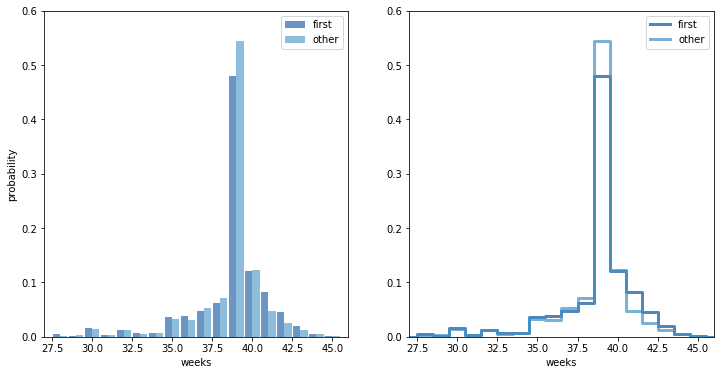

<Figure size 576x432 with 0 Axes>

In [9]:
preg = nsfg.ReadFemPreg(dct_file='datasets/2002FemPreg.dct',  dat_file='datasets/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

first_pmf = thinkstats2.Pmf(firsts.prglngth, label='first')
other_pmf = thinkstats2.Pmf(others.prglngth, label='other')

width = 0.45

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='probability', axis=[27, 46, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks', axis=[27, 46, 0, 0.6])

通过绘制PMF而非直方图，我们可以不受样本量差异的影响，对两个分布进行比较。从图中我们可以看到，比起其他胎，第一胎似乎较少会准时出生（39周），而更可能会较晚出生（41周和42周）。

`PrePlot`通过两个可选参数`rows`和`cols`将图形显示在网格中，上述代码设置将图形显示为一行两列。第一个图形（左侧）使用前面介绍过的`thinkplot.Hist`显示Pmf。

代码中第二次调用的`PrePlot`方法重置了色彩生成器，然后`SubPlot`切换到第二个图形（右侧），使用`thinkplot.Pmf`绘制Pmf对象。代码中使用了`axis`参数，确保两张图位于同样的坐标轴上。如果要比较两个图形，设置`axis`参数通常是个不错的主意。

## 3.3 绘制PMF的其他方法
在探索数据并尝试发现其中的模式和关系时，直方图和PMF都是非常实用的。一旦你对数据有了大致的了解，下一步最好设计一种可视化方法，尽可能清晰地展现你所发现的模式。

在全国家庭增长调查数据中，第一胎和其他数据分布的最大区别位于众数附近。因此，我们应该对图形中的这部分进行放大，并转换数据，以强调这种区别：

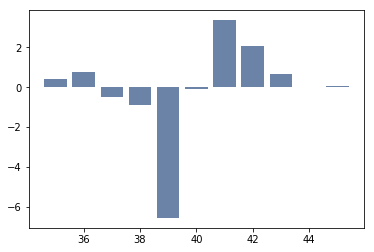

In [10]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)

在这段代码中，`weeks`是周数范围，`diffs`是两个PMF差异的百分数。上面的条形图使数据模式更加清晰：相比其他胎，第一胎较少在第39周出生，在第41周和第42周出生的可能性稍大。

目前，我们应该对此结论持谨慎态度。我们使用了同一个数据集来发现一个明显差异，然后选择一种可视化方法来强调这一差异。我们不能确定这种效应是否真的存在，它也许只是随机变化的结果。本书稍后将解决这一疑问。

## 3.4 课堂规模悖论
在继续讨论之前，我要演示一种Pmf对象的计算。我称之为`课堂规模悖论`。

在很多美国大学和学院里，学生与教师的比率约为10:1。但是学生们经常会惊讶地发现自己课上的平均学生数大于10。造成这一现象的原因有两个：
+ 学生通常每学期修4到5门课，但是教授经常只教1门或2门；
+ 上小课的学生很少，但上大课的学生人数非常之多。

一旦我们知道了第一个原因，其效应就是显而易见的。第二个就不那么明显了。让我们来看一个例子。假设一所学院某学期开了65门课，选课人数分布如下：
```
size count
5- 9     8
10-14    8
15-19   14
20-24    4
25-29    6
30-34   12
35-39    8
40-44    3
45-49    2
```

如果你问院长，每门课平均的选课人数是多少，他会构建一个PMF，计算出均值，然后回答说选课人数平均为23.7：

In [11]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')
('mean:', pmf.Mean())

('mean:', 23.692307692307693)

但是如果对一组学生进行调查，询问他们的课堂上有多少学生，然后计算出均值，那么会发现选课人数的平均值比23.7大。具体大多少呢？

首先，计算出学生观察到的分布，其中每个课堂规模值的概率受到选课的学生人数的`影响`  :

In [12]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

对每个课堂规模值$x$，我们将其概率乘以$x$，即观察该课堂规模的学生人数，最终能得到一个新的Pmf，代表这个`偏倚分布`：

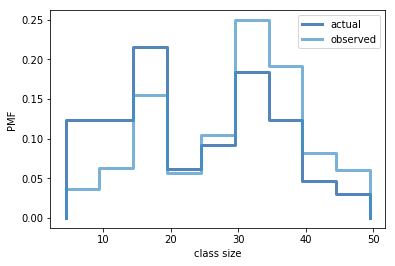

<Figure size 576x432 with 0 Axes>

In [13]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

在偏倚分布中，小课更少，大课更多。偏倚分布的均值为29.1，比实际的均值高出约25%

我们也可以反向进行这一操作。假设你希望得到一所学院的课堂规模分布，但却无法从院长处得到可靠数据。你可以采用另一个办法：选择学生的一个随机样本，进行调查，询问他们的课堂上有多少学生。

因为存在我们前面讨论过的原因，所以这个调查得到的结果是偏倚的，但是你可以使用这一结果来估算实际分布。下面的函数对一个Pmf进行`去偏倚`操作：

In [14]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)

    new_pmf.Normalize()
    return new_pmf

这个函数与BiasPmf很类似，唯一的区别在于这个函数将每个概率除以$x$，而不是乘以$x$。

## 3.5 使用DataFrame进行索引
首先，创建一个NumPy随机数组，用它初始化一个DataFrame：

In [15]:
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,-1.025011,0.820651
1,-0.523976,0.307290
2,0.886731,1.709926
3,1.565558,-0.239306


默认情况下，DataFrame的行和列都是从0开始计数的，但你可以提供列名：

In [16]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,-1.025011,0.820651
1,-0.523976,0.307290
2,0.886731,1.709926
3,1.565558,-0.239306


你也可以提供行名。行名的集合称为`索引`（index），行名则称为`标签`（label）：

In [17]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-1.025011,0.820651
b,-0.523976,0.307290
c,0.886731,1.709926
d,1.565558,-0.239306


可以使用索引选择一个列，返回一个Series对象：

In [18]:
df['A']

a   -1.025011
b   -0.523976
c    0.886731
d    1.565558
Name: A, dtype: float64

可以使用`loc`属性通过标签选择一行，返回一个Series对象：

In [19]:
df.loc['a']

A   -1.025011
B    0.820651
Name: a, dtype: float64

如果只知道一行的整数位置，而不是它的标签，则可以使用`iloc`属性，它也可以返回一个Series对象：

In [20]:
df.iloc[0]

A   -1.025011
B    0.820651
Name: a, dtype: float64

`loc`属性也可以以一列标签为参数，这种情况下会返回一个DataFrame对象：

In [21]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,-1.025011,0.820651
c,0.886731,1.709926


可以使用一个切片，通过标签选择行的范围：

In [22]:
df['a':'c']

,A,B
a,-1.025011,0.820651
b,-0.523976,0.307290
c,0.886731,1.709926


In [23]:
df[0:2]

,A,B
a,-1.025011,0.820651
b,-0.523976,0.307290
